## Monterey Bay bathymetry
### MLML MS 263

This notebook shows how to plot bathymetry data from the NOAA 3-second coastal relief model.

First load Python modules. The basemap module allows you to plot data on a map. Many different map projections are available.

In [8]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap

Specify the location of the bathymetry data.

In [9]:
bathy_asc = 'data/bathymetry/crm-montereybay.asc'

This function reads a NOAA bathymetry file and loads the data into Python variables.

In [10]:
def load_crm_asc(data_file):
    '''
    Load bathymetry data from NOAA Coastal Relief model data set.
    For data in ascii format generated at:
    http://maps.ngdc.noaa.gov/viewers/wcs-client/
    
    Returns:
    z: mxn array of elevation values (negative for depth in ocean, positive on land)
    lon: array of n longitude values
    lat: array of m latitude values
    
    Tom Connolly, MLML (3/2016)
    '''

    # read information from header lines
    f = open(data_file)
    lines = f.readlines()
    ncols = int(lines[0][10:])
    nrows = int(lines[1][10:])
    xllcorner = float(lines[2][10:])
    yllcorner = float(lines[3][10:])
    cellsize = float(lines[4][10:])
    # create latitude and longitude arrays from info in header
    lon = np.empty(ncols)
    lat = np.empty(nrows)
    for ii in range(ncols):
        lon[ii] = xllcorner+cellsize*ii
    for jj in range(nrows):
        lat[jj] = yllcorner+cellsize*jj
    lat = lat[::-1] # flip latitude array so first row (top) is highest latitude
    
    # read elevation data
    z = np.genfromtxt(data_file,skip_header=5,delimiter=' ')
    return z, lon, lat

Use this function for the data file specified above.

In [11]:
z,lon,lat = load_crm_asc(bathy_asc)

This command takes 1-D arrays of lon and lat and turns them into 2-D arrays with the same shape as z. Each LAT and LON value corresponds to a z value.

In [12]:
LON,LAT = np.meshgrid(lon,lat)
print(np.shape(lon))
print(np.shape(LON))
print(np.shape(z))

(1801,)
(1801, 1801)
(1801, 1801)


Since this data is on a longitude/latitude we want to use a map projection. The Basemap function defines a projection. In this case, a mercator projection is used.

In [13]:
m = Basemap(projection='merc',llcrnrlat=np.min(lat),urcrnrlat=np.max(lat),\
            llcrnrlon=np.min(lon),urcrnrlon=np.max(lon))

Now the data can be contoured. The contour function needs at least three variables. One to define the x value of each point (LON in this case), one to define the y value of each point (LAT in this case), and one to define the value of the variable being countoured (z in this case).

<IPython.core.display.Javascript object>


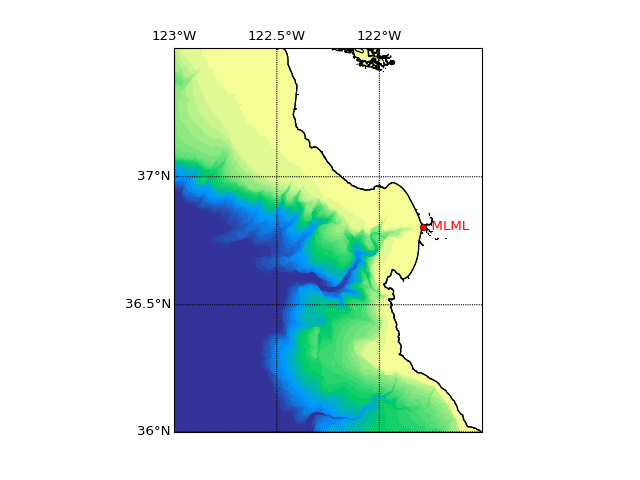

/Users/tomconnolly/programs/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3719: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]
/Users/tomconnolly/programs/anaconda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3617: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  xx = x[x.shape[0]/2,:]


In [36]:
m.contourf(LON,LAT,z,latlon=True,levels=np.arange(-3600,100,100),cmap='terrain') # plot contour lines for every 200m isobath
#plt.colorbar()
plt.clim(-2500,2500)
m.contour(LON,LAT,z,latlon=True,levels=[-1e-16,0],colors='k') # plot the coastline (z=0) as a black line.
m.drawparallels(np.arange(35,38,0.5),labels=[True,False,False,False])
m.drawmeridians(np.arange(-128,-120,0.5),labels=[False,False,True,False])

mlml_lon = -121.7869
mlml_lat = 36.8044
x,y = m(mlml_lon, mlml_lat)
m.plot(x, y, 'ro', markersize=6)
plt.text(x,y,'  MLML',color='r',va='center')